# Study Case 6✨


Dalam dunia hiburan, industri film memiliki peran penting dalam membawa cerita dan emosi kepada penonton. Dataset "IMDb Indonesian Movies" berisi kumpulan ulasan film dari berbagai pengguna yang diungkapkan dalam kata-kata. Seorang analis data bernama Ethan bersemangat untuk mengeksplorasi dataset ini dan melakukan analisis sentimen untuk memahami bagaimana penonton merespons film-film yang berbeda. Pertanyaan :

Menghubungkan file CSV ke *Google Collab.*

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path="/content/drive/MyDrive/Dataset/indonesian_movies.csv"
df=pd.read_csv(path)
df.head(10)

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min
5,Guru-Guru Gokil,2020,"When staff salaries get stolen at his school, ...",Comedy,NaN,6.1,153,Indonesian,Sammaria Simanjuntak,"['Gading Marten', 'Boris Bokir', 'Kevin Ardilo...",101 min
6,Hunter in the Blue Side of Manchester,2020,This movie tells the story of Hanif Thamrin (A...,Biography,13+,6.2,21,English,Rako Prijanto,"['Adipati Dolken', 'Ganindra Bimo', 'Vonny Cor...",90 min
7,Janin,2020,Randu (Reuben Elishama Hadju) and Dinar (Jill ...,Horror,17+,6.1,7,Indonesian,Ook Budiyono,"['Jill Gladys', 'Reuben Elishama', 'Meriam Bel...",85 min
8,Mangkujiwo,2020,A born of Kuntilanak from a Twin Mirror with h...,Horror,17+,5.9,67,Indonesian,Azhar Kinoi Lubis,"['Sujiwo Tejo', 'Yasamin Jasem', 'Asmara Abiga...",109 min
9,Mariposa,2020,Iqbal (Angga Yunanda) is like a Mariposa butte...,Drama,13+,8.5,54,Indonesian,Fajar Bustomi,"['Angga Yunanda', 'Adhisty Zara', 'Dannia Sals...",117 min


# Point A


Bagaimana distribusi genre film dalam dataset ini? Buat bar chart untuk memvisualisasikan genre-genre yang ada.

<ipython-input-3-082a18921177>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['genre'].str.split(',')


<Figure size 1000x600 with 0 Axes>

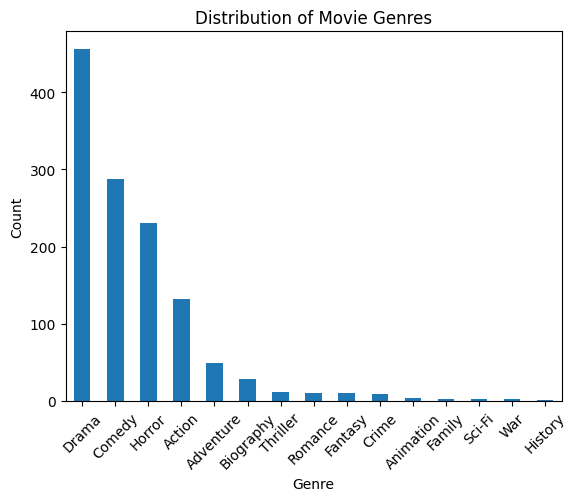

In [ ]:
# Menghapus baris dengan nilai-nilai genre yang hilang
df = df.dropna(subset=['genre'])

# Memisahkan string genre menjadi list
df['genre'] = df['genre'].str.split(',')

# Create a set to store unique genres
unique_genres = set()

# Iterate through each row and add genres to the set
for genres in df['genre']:
    unique_genres.update(genres)

# Convert the set to a sorted list
sorted_unique_genres = sorted(unique_genres)

# Count occurrences of each genre
genre_count = {genre: 0 for genre in sorted_unique_genres}
for genres in df['genre']:
    for genre in genres:
        genre_count[genre] += 1

# Convert genre_count dictionary to DataFrame
genre_df = pd.DataFrame.from_dict(genre_count, orient='index', columns=['count'])
genre_df = genre_df.sort_values(by='count', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
genre_df.plot(kind='bar', legend=None)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Point B

Bagaimana distribusi kelompok rating (users_rating) pada film-film dalam dataset ini? Buat histogram atau density plot untuk menunjukkan distribusi rating.

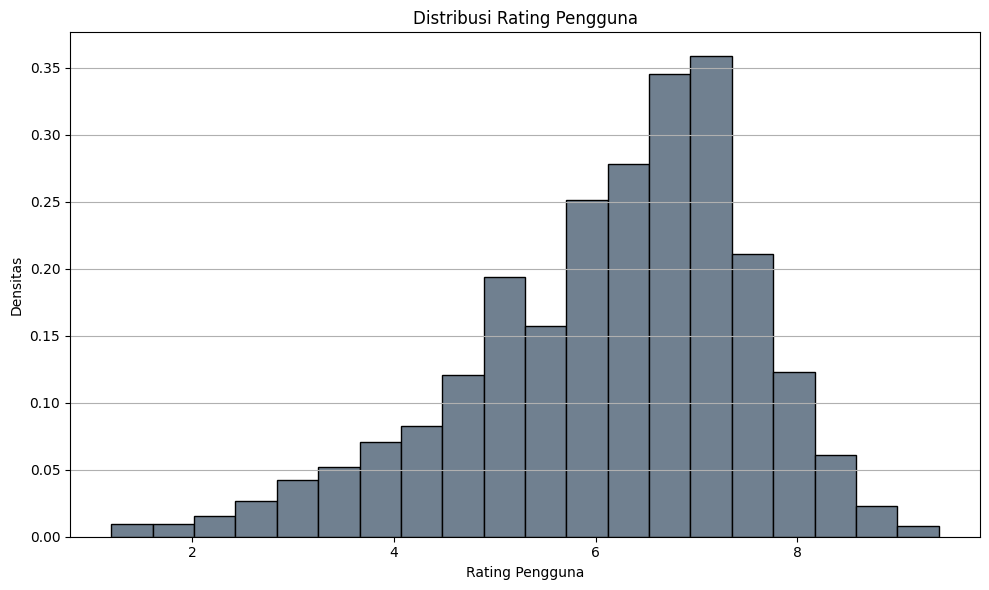

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['users_rating'], bins=20, color='slategrey', edgecolor='black', density=True)
plt.title('Distribusi Rating Pengguna')
plt.xlabel('Rating Pengguna')
plt.ylabel('Densitas')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Point C

Siapa direktur dengan jumlah film terbanyak? Buat pie chart untuk menunjukkan beberapa direktur terbaik.

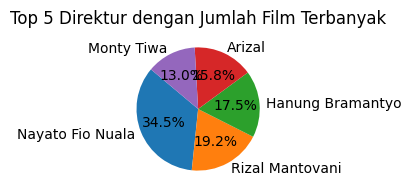

In [ ]:
#LaluAldo
director_counts = df['directors'].value_counts()
top_directors = director_counts.head(5)  # Change the number as needed
plt.figure(figsize=(2, 2))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Direktur dengan Jumlah Film Terbanyak')
plt.show()

# Point D

Tampilkan 10 film dengan rating tertinggi! buat bar chart untuk memvisualisasikan rating film-film tersebut.

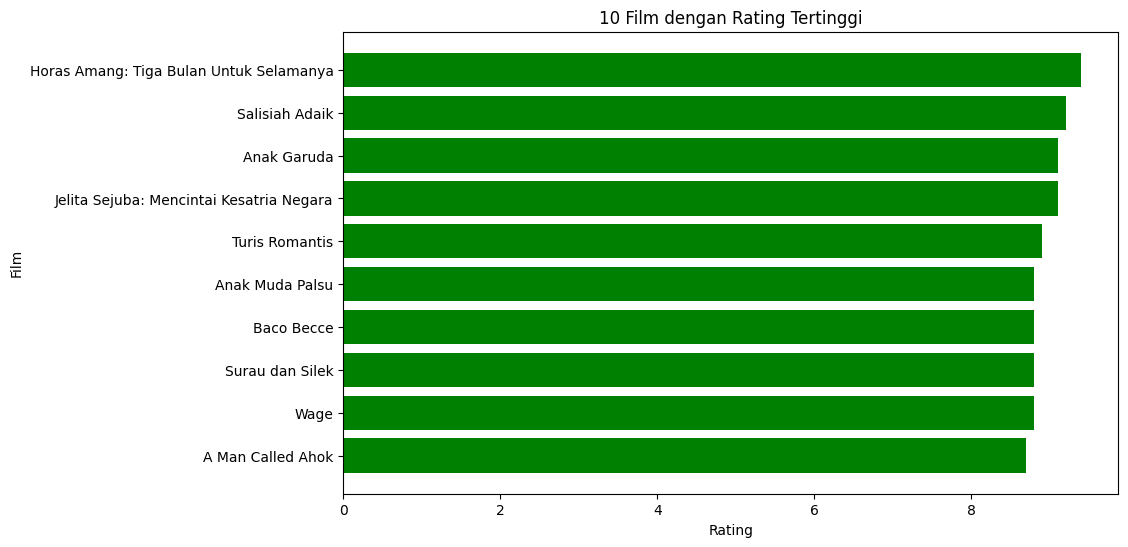

In [ ]:
#LaluAldo
top_rated_movies = df.nlargest(10, 'users_rating')
plt.figure(figsize=(10, 6))
plt.barh(top_rated_movies['title'], top_rated_movies['users_rating'], color='green')
plt.title('10 Film dengan Rating Tertinggi')
plt.xlabel('Rating')
plt.ylabel('Film')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated movie on top
plt.show()

# Point E

Kesimpulan dari hasil analisis di atas.

In [ ]:
print("""Kesimpulan
- Distribusi genre film menunjukkan bahwa Genre Drama adalah genre yang mendominasi tontonan masyarakat Indonesia, dengan perbedaan yang hampir mencapai 25% dari posisi kedua, yaitu Genre Comedy, diikuti oleh Genre
  Horror yang berada di urutan ke-3
- Distribusi kelompok Rating menunjukkan bahwa film Indonesia memiliki kualitas yang cukup baik, namun adapun film-film yang memiliki kualitas yang kurang baik ataupun bisa dibilang 'Jelek'.
- Direktur dengan jumlah film terbanyak dipegang oleh Nayato Fio Nuala yang menyutradarai film Drama, seperti Heart 2 Heart, dan film Horror, seperti Kereta Hantu Mangarai, dengan rata-rata rating film yang
  disutradarainya adalah 4.8, dengan Rating tertinggi dipegang oleh Heart 2 Heart dengan Rating 8.4/10 dan Rating Terendah dipegang oleh Malam Jum'at Kliwon dengan Rating 2.1/10
- 10 Film dengan rating tertinggi adalah
  1. Horas Amang : Tiga Bulan Untuk Selamanya yang disutradarai oleh Irham Acho Bahtiar dan Steve R.R. Wantania
  2. Salisiah Adaik yang disutradarai oleh Ferdinand Almi
  3. Anak Garuda yang disutradarai oleh Faozan Rizal dan Verdi Solaiman
  4. Jelita Sejuba : Mencintai Kestaria Negara yang disutradarai oleh Ray Nayoan
  5. Turis Romantis yang disutradarai oleh Senoaji Julius
  6. Anak Muda Palsu yang disutradarai oleh Ihdar Nur
  7. Baco Becce yang disutradarai oleh Syahrir Arsyad Dini
  8. Surau dan Silek yang disutradarai oleh Arief Malinmudo
  9. Wage yang disutradarai oleh John de Rantau
  10. A Man Called Ahok yang disutradarai oleh Putrama Tuta
""")

Kesimpulan
- Distribusi genre film menunjukkan bahwa Genre Drama adalah genre yang mendominasi tontonan masyarakat Indonesia, dengan perbedaan yang hampir mencapai 25% dari posisi kedua, yaitu Genre Comedy, diikuti oleh Genre
  Horror yang berada di urutan ke-3
- Distribusi kelompok Rating menunjukkan bahwa film Indonesia memiliki kualitas yang cukup baik, namun adapun film-film yang memiliki kualitas yang kurang baik ataupun bisa dibilang 'Jelek'.
- Direktur dengan jumlah film terbanyak dipegang oleh Nayato Fio Nuala yang menyutradarai film Drama, seperti Heart 2 Heart, dan film Horror, seperti Kereta Hantu Mangarai, dengan rata-rata rating film yang
  disutradarainya adalah 4.8, dengan Rating tertinggi dipegang oleh Heart 2 Heart dengan Rating 8.4/10 dan Rating Terendah dipegang oleh Malam Jum'at Kliwon dengan Rating 2.1/10
- 10 Film dengan rating tertinggi adalah
  1. Horas Amang : Tiga Bulan Untuk Selamanya yang disutradarai oleh Irham Acho Bahtiar dan Steve R.R. Wantania
  2. Sali